In [12]:
import pandas as pd
import numpy as np
import tensorflow
from tensorflow import keras
import matplotlib.pyplot as plt
from keras.preprocessing.image import  ImageDataGenerator as Imgen

In [13]:
#Augmenting the training dataset
traingen = Imgen(
                 rescale=1./255,
                 shear_range= 0.2,
                 zoom_range = 0.3,
                 width_shift_range = 0.2,
                 height_shift_range  =0.2,
                 fill_mode = "nearest",
                 validation_split=0.15)
#Augmenting the testing dataset
testgen = Imgen(# rescale the images to 1./255 
                rescale = 1./255
                )

In [14]:
trainds = traingen.flow_from_directory("Training/",
                                       target_size = (130,130),
                                       seed=123,
                                       batch_size  = 16,
                                       subset="training"
                                      )
valds = traingen.flow_from_directory("Training",
                                     target_size = (130,130),
                                     seed=123,
                                     batch_size  = 16,
                                     subset="validation"
                                      )
testds = testgen.flow_from_directory("Validation",
                                     target_size = (130,130),
                                     seed=123,
                                     batch_size  = 16,
                                     shuffle=False)

Found 2441 images belonging to 4 classes.
Found 429 images belonging to 4 classes.
Found 394 images belonging to 4 classes.


In [15]:
c = trainds.class_indices
classes = list(c.keys())
classes

['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']

In [16]:
x,y = next(trainds)                             #function returns the next item in an iterator.
def plotImages(x,y):
    plt.figure(figsize=[15,11])                 #size of the plot
    for i in range(16):                         #16 images
        plt.subplot(4,4,i+1)                    #4 by 4 plot    
        plt.imshow(x[i])                        #Imshow() is a function of matplotlib displays the image
        plt.title(classes[np.argmax(y[i])])     # Class of the image will be it's title
        plt.axis("off")
    plt.show() 

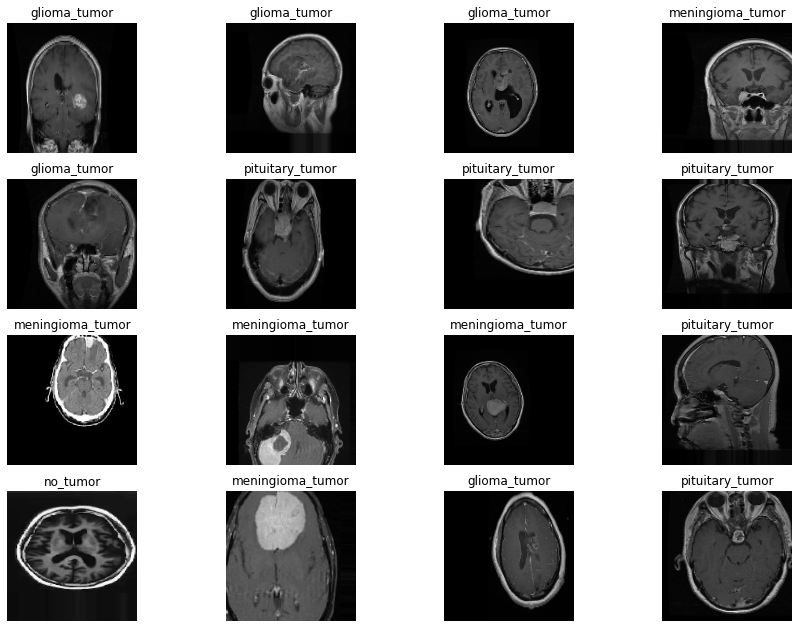

In [17]:
#Call the plotImages function
plotImages(x,y)

In [18]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D, Activation
from keras.metrics import categorical_crossentropy
from tensorflow.keras.optimizers import Adam

In [32]:
cnn = Sequential([
    # first Layer
    Conv2D(filters=16, kernel_size=(3, 3), padding = 'same', activation='relu', input_shape=(130, 130, 3)),
    MaxPooling2D((2, 2)),
    # second layer
    Conv2D(filters=32, kernel_size=(3, 3), padding = 'same', activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.20),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(10, activation='relu'),
    Dense(4, activation='softmax')
])

In [33]:
cnn.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 130, 130, 16)      448       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 65, 65, 16)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 65, 65, 32)        4640      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 32768)             0         
_________________________________________________________________
dense_8 (Dense)              (None, 64)               

In [34]:
cnn.compile(loss="categorical_crossentropy",
              optimizer = "Adam",metrics=["accuracy"])

In [35]:
history = cnn.fit(trainds,validation_data=valds,epochs=50, batch_size=16, verbose=1)

Epoch 1/50
153/153 [==============================] - 14s 87ms/step - loss: 1.2879 - accuracy: 0.3839 - val_loss: 1.3207 - val_accuracy: 0.3566
Epoch 2/50
153/153 [==============================] - 13s 85ms/step - loss: 1.1049 - accuracy: 0.4998 - val_loss: 1.0872 - val_accuracy: 0.5128
Epoch 3/50
153/153 [==============================] - 13s 85ms/step - loss: 1.0302 - accuracy: 0.5485 - val_loss: 1.1140 - val_accuracy: 0.4802
Epoch 4/50
153/153 [==============================] - 13s 85ms/step - loss: 0.9370 - accuracy: 0.5895 - val_loss: 1.1358 - val_accuracy: 0.4942
Epoch 5/50
153/153 [==============================] - 13s 86ms/step - loss: 0.9161 - accuracy: 0.6108 - val_loss: 1.0452 - val_accuracy: 0.5524
Epoch 6/50
153/153 [==============================] - 13s 85ms/step - loss: 0.8602 - accuracy: 0.6374 - val_loss: 1.1228 - val_accuracy: 0.5478
Epoch 7/50
153/153 [==============================] - 13s 87ms/step - loss: 0.8392 - accuracy: 0.6514 - val_loss: 1.1123 - val_accuracy:

In [38]:
cnn.evaluate(testds)

25/25 [==============================] - 1s 57ms/step - loss: 5.5797 - accuracy: 0.4315


[5.5796637535095215, 0.4314720928668976]

<AxesSubplot:>

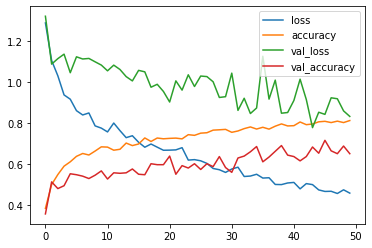

In [39]:
pd.DataFrame(history.history).plot()